In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("../Data/final_clean_data.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,...,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed
0,4,1,2,AA,GEG,WA,PHX,AZ,6.53,-5.0,...,-1.0,9.33,168.0,1020.0,5,33.0,36.0,89.0,5.0,10.0
1,4,1,2,AA,GEG,WA,PHX,AZ,15.45,15.0,...,1.0,18.12,160.0,1020.0,5,33.0,45.0,63.0,10.0,10.0
2,4,1,2,AA,SEA,WA,CLT,NC,7.33,-3.0,...,-1.0,15.32,299.0,2279.0,10,37.0,43.0,80.0,10.0,6.0
3,4,1,2,AA,SEA,WA,CLT,NC,13.83,-3.0,...,-1.0,21.83,300.0,2279.0,10,41.0,49.0,74.0,10.0,6.0
4,4,1,2,AA,SEA,WA,CLT,NC,22.00,-6.0,...,-1.0,6.00,300.0,2279.0,10,41.0,45.0,86.0,10.0,7.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45155 entries, 0 to 45154
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MONTH                      45155 non-null  int64  
 1   DAY_OF_MONTH               45155 non-null  int64  
 2   DAY_OF_WEEK                45155 non-null  int64  
 3   OP_UNIQUE_CARRIER          45155 non-null  object 
 4   ORIGIN                     45155 non-null  object 
 5   ORIGIN_STATE_ABR           45155 non-null  object 
 6   DEST                       45155 non-null  object 
 7   DEST_STATE_ABR             45155 non-null  object 
 8   CRS_DEP_TIME               45155 non-null  float64
 9   DEP_DELAY                  45155 non-null  float64
 10  DEP_DELAY_NEW              45155 non-null  float64
 11  DEP_DEL15                  45155 non-null  float64
 12  DEP_DELAY_GROUP            45155 non-null  float64
 13  CRS_ARR_TIME               45155 non-null  flo

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed
count,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000
mean,5.046728,15.877489,3.971321,13.585353,0.125833,3.996368,0.117418,-0.504241,15.123422,183.310597,1175.492703,5.098970,42.800066,59.471664,57.692747,9.810818,8.246529
std,0.808438,8.780866,2.005020,5.287004,10.457920,7.926741,0.321921,0.764952,5.585735,84.569100,732.185970,2.955206,6.723190,9.337098,18.536586,0.983229,3.873726
min,4.000000,1.000000,1.000000,0.080000,-27.000000,0.000000,0.000000,-2.000000,0.020000,49.000000,93.000000,1.000000,5.000000,30.000000,11.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,9.080000,-7.000000,0.000000,0.000000,-1.000000,11.080000,125.000000,679.000000,3.000000,39.000000,53.000000,44.000000,10.000000,6.000000
50%,5.000000,16.000000,4.000000,12.970000,-3.000000,0.000000,0.000000,-1.000000,15.680000,166.000000,978.000000,4.000000,43.000000,58.000000,59.000000,10.000000,8.000000
75%,6.000000,23.000000,6.000000,17.900000,4.000000,4.000000,0.000000,0.000000,19.220000,244.000000,1721.000000,7.000000,48.000000,65.000000,71.000000,10.000000,10.000000
max,6.000000,31.000000,7.000000,23.980000,35.000000,35.000000,1.000000,2.000000,23.980000,411.000000,2724.000000,11.000000,60.000000,102.000000,100.000000,10.000000,30.000000


In [4]:
df.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
ORIGIN                       0
ORIGIN_STATE_ABR             0
DEST                         0
DEST_STATE_ABR               0
CRS_DEP_TIME                 0
DEP_DELAY                    0
DEP_DELAY_NEW                0
DEP_DEL15                    0
DEP_DELAY_GROUP              0
CRS_ARR_TIME                 0
CRS_ELAPSED_TIME             0
DISTANCE                     0
DISTANCE_GROUP               0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyRelativeHumidity       0
HourlyVisibility             0
HourlyWindSpeed              0
dtype: int64

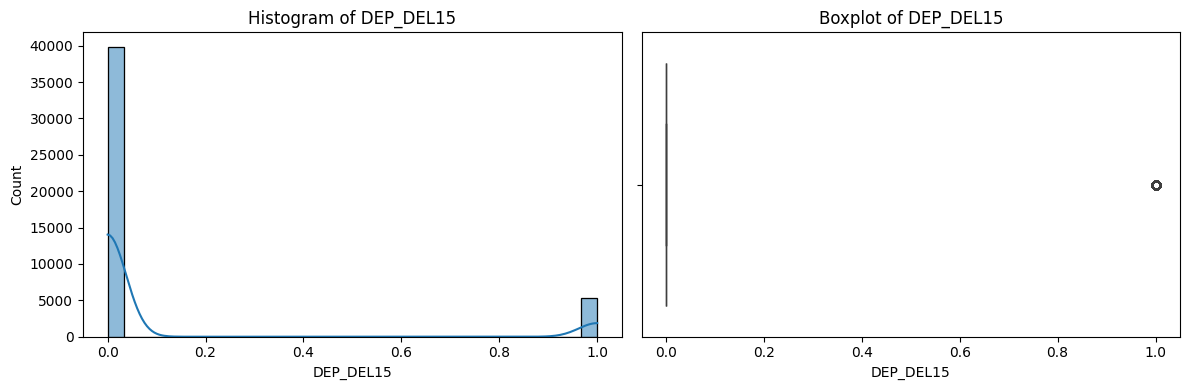

In [5]:
ta_col = ["DEP_DEL15"]

for col in ta_col:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [6]:
keep_cols = [
    "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK",
    "CRS_DEP_TIME", "CRS_ELAPSED_TIME",
    "OP_UNIQUE_CARRIER", "ORIGIN", "DEST",
    "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed",
    "DEP_DEL15"
]

flight_dep_model = df[keep_cols].copy()
print("Dataset for flight delay model:", flight_dep_model.shape)
flight_dep_model.head(5)


Dataset for flight delay model: (45155, 15)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ELAPSED_TIME,OP_UNIQUE_CARRIER,ORIGIN,DEST,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,DEP_DEL15
0,4,1,2,6.53,168.0,AA,GEG,PHX,1020.0,33.0,36.0,89.0,5.0,10.0,0.0
1,4,1,2,15.45,160.0,AA,GEG,PHX,1020.0,33.0,45.0,63.0,10.0,10.0,1.0
2,4,1,2,7.33,299.0,AA,SEA,CLT,2279.0,37.0,43.0,80.0,10.0,6.0,0.0
3,4,1,2,13.83,300.0,AA,SEA,CLT,2279.0,41.0,49.0,74.0,10.0,6.0,0.0
4,4,1,2,22.00,300.0,AA,SEA,CLT,2279.0,41.0,45.0,86.0,10.0,7.0,0.0


### Encoding cyclical features

In [7]:
import numpy as np

# ---- 1. Cyclical encoding for DAY_OF_MONTH (1–31) ----
flight_dep_model['DAY_OF_MONTH_sin'] = np.sin(2 * np.pi * df['DAY_OF_MONTH'] / 31)
flight_dep_model['DAY_OF_MONTH_cos'] = np.cos(2 * np.pi * df['DAY_OF_MONTH'] / 31)

# ---- 2. Cyclical encoding for DAY_OF_WEEK (1–7) ----
flight_dep_model['DAY_OF_WEEK_sin'] = np.sin(2 * np.pi * df['DAY_OF_WEEK'] / 7)
flight_dep_model['DAY_OF_WEEK_cos'] = np.cos(2 * np.pi * df['DAY_OF_WEEK'] / 7)

# ---- 3. Cyclical encoding for CRS_DEP_TIME (0–24h) ----
# Ensure CRS_DEP_TIME is within [0, 24)
flight_dep_model['CRS_DEP_TIME_sin'] = np.sin(2 * np.pi * df['CRS_DEP_TIME'] / 24)
flight_dep_model['CRS_DEP_TIME_cos'] = np.cos(2 * np.pi * df['CRS_DEP_TIME'] / 24)

print(flight_dep_model[["CRS_DEP_TIME", "CRS_DEP_TIME_sin", "CRS_DEP_TIME_cos"]].head(10))


   CRS_DEP_TIME  CRS_DEP_TIME_sin  CRS_DEP_TIME_cos
0          6.53          0.990389         -0.138309
1         15.45         -0.785317         -0.619094
2          7.33          0.939991         -0.341200
3         13.83         -0.460974         -0.887413
4         22.00         -0.500000          0.866025
5          5.37          0.986429          0.164187
6          7.00          0.965926         -0.258819
7         10.68          0.338738         -0.940881
8         11.92          0.020942         -0.999781
9         14.08         -0.518027         -0.855364


In [8]:
# Identify categorical and numerical features
categorical_cols = ["MONTH", "OP_UNIQUE_CARRIER", "ORIGIN", "DEST"]

numeric_cols = [
    "DAY_OF_MONTH_sin", "DAY_OF_MONTH_cos", "DAY_OF_WEEK_sin", "DAY_OF_WEEK_cos", "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed",
    "CRS_DEP_TIME_sin", "CRS_DEP_TIME_cos"
]

### Encoding



In [9]:
label_cols = ["OP_UNIQUE_CARRIER", "ORIGIN", "DEST"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    flight_dep_model[col] = le.fit_transform(flight_dep_model[col])
    label_encoders[col] = le
    print(f" {col}: {len(le.classes_)} categories encoded.")

tree_ready_cols = [
    "MONTH", "DAY_OF_MONTH_sin", "DAY_OF_MONTH_cos", "DAY_OF_WEEK_sin", "DAY_OF_WEEK_cos",
    "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed",
    "CRS_DEP_TIME_sin", "CRS_DEP_TIME_cos",
    "OP_UNIQUE_CARRIER", "ORIGIN", "DEST",
    "DEP_DEL15"
]

flight_dep_tree = flight_dep_model[tree_ready_cols]

print("\n Dataset after Label Encoding:")
print("Number of rows:", flight_dep_tree.shape[0])
print("Number of columns:", flight_dep_tree.shape[1])
print("\n Sample of encoded categorical features:")
print(flight_dep_tree.dtypes.value_counts())

print(flight_dep_tree.head(5))

flight_dep_tree.to_csv("flight_dep_classi.csv", index=False)

 OP_UNIQUE_CARRIER: 12 categories encoded.
 ORIGIN: 5 categories encoded.
 DEST: 86 categories encoded.

 Dataset after Label Encoding:
Number of rows: 45155
Number of columns: 18

 Sample of encoded categorical features:
float64    14
int64       4
Name: count, dtype: int64
   MONTH  DAY_OF_MONTH_sin  DAY_OF_MONTH_cos  DAY_OF_WEEK_sin  \
0      4          0.201299           0.97953         0.974928   
1      4          0.201299           0.97953         0.974928   
2      4          0.201299           0.97953         0.974928   
3      4          0.201299           0.97953         0.974928   
4      4          0.201299           0.97953         0.974928   

   DAY_OF_WEEK_cos  CRS_ELAPSED_TIME  DISTANCE  HourlyDewPointTemperature  \
0        -0.222521             168.0    1020.0                       33.0   
1        -0.222521             160.0    1020.0                       33.0   
2        -0.222521             299.0    2279.0                       37.0   
3        -0.222521       